In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

     ------------------------------------- 950.8/950.8 kB 30.3 MB/s eta 0:00:00
     ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
     ---------------------------------------- 240.7/240.7 kB ? eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 34.2 MB/s eta 0:00:00
     ---------------------------------------- 101.3/101.3 kB ? eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB ? eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 37.7 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\pygmentize.exe' -> 'C:\\Python311\\Scripts\\pygmentize.exe.deleteme'


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wheel.exe' -> 'C:\\Python311\\Scripts\\wheel.exe.deleteme'


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 32.6 MB/s eta 0:00:00
     ------------------------------------- 187.6/187.6 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.4 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 16.7 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install jupyter-themes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement jupyter-themes (from versions: none)
ERROR: No matching distribution found for jupyter-themes

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt


print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

ModuleNotFoundError: No module named 'keras_core'

In [ ]:
#add dataset using api key
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 153MB/s]


In [8]:
! unzip llm-detect-ai-generated-text

Archive:  llm-detect-ai-generated-text.zip
  inflating: sample_submission.csv   
  inflating: test_essays.csv         
  inflating: train_essays.csv        
  inflating: train_prompts.csv       


In [9]:
#df_train_prompts = pd.read_csv(DATA_DIR + "train_prompts.csv")
df_train_prompts = pd.read_csv("train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes
None


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [10]:
#df_train_essays = pd.read_csv(DATA_DIR + "train_essays.csv")
df_train_essays = pd.read_csv("train_essays.csv")
print(df_train_essays.info())
df_train_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


Text(0.5, 1.0, 'Distribution of prompt ID')

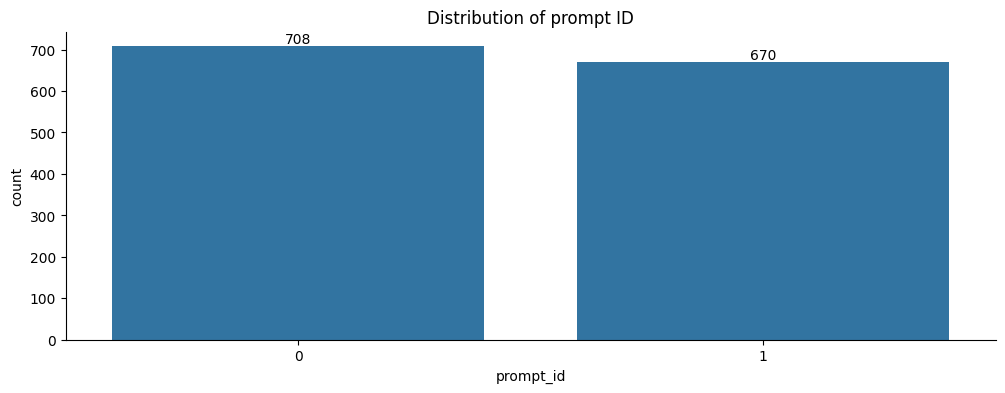

In [11]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="prompt_id")

abs_values = df_train_essays['prompt_id'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt ID")

Text(0.5, 1.0, 'Distribution of Generated Text')

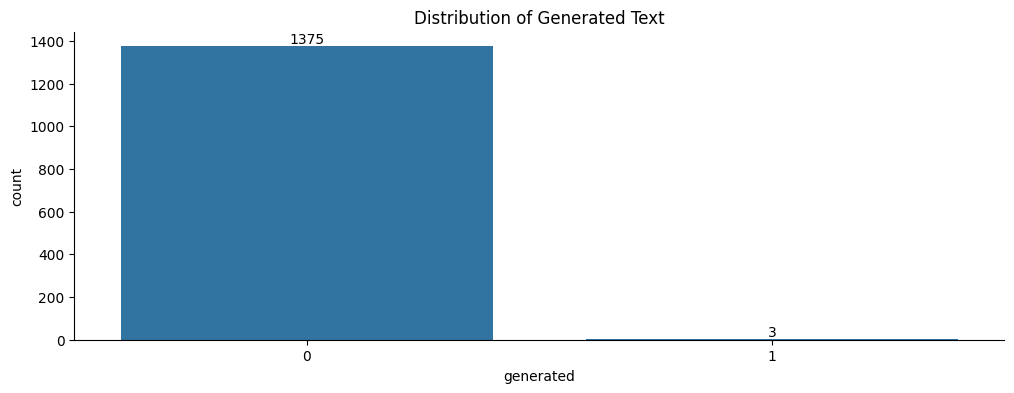

In [12]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="generated")

abs_values = df_train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [13]:
#df_test_essays = pd.read_csv(DATA_DIR + "test_essays.csv")
df_test_essays = pd.read_csv("test_essays.csv")
print(df_test_essays.info())
df_test_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None


,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [14]:
df_test_essays["text"].apply(lambda x : len(x))

0    12
1    12
2    12
Name: text, dtype: int64

In [15]:
! kaggle datasets download thedrcat/daigt-v2-train-dataset

 70% 20.0M/28.5M [00:00<00:00, 87.6MB/s]
100% 28.5M/28.5M [00:00<00:00, 96.9MB/s]


In [16]:
! unzip daigt-v2-train-dataset

Archive:  daigt-v2-train-dataset.zip
  inflating: train_v2_drcat_02.csv   


In [17]:
df_train_essays_ext = pd.read_csv('train_v2_drcat_02.csv')

df_train_essays_ext.rename(columns = {"label":"generated"}, inplace=True)

df_train_essays_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [18]:
df_train_essays_ext.head()

,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


Text(0.5, 1.0, 'Distribution of Generated Text')

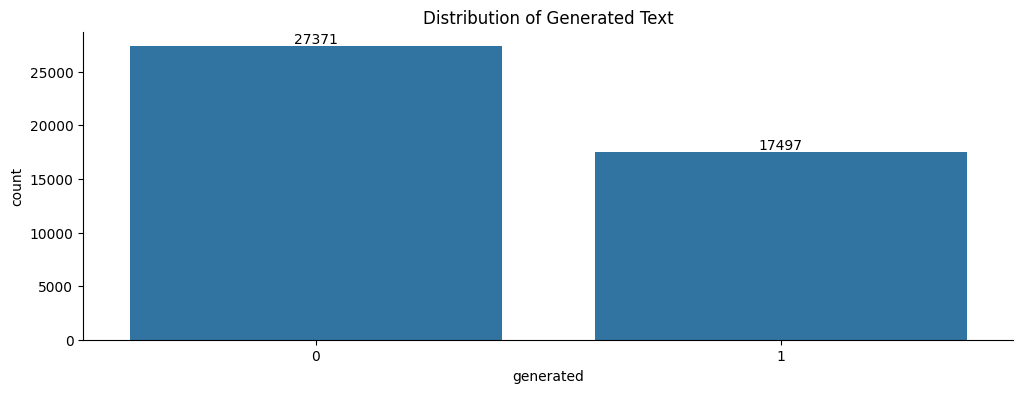

In [19]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_ext,
                   x="generated")

abs_values = df_train_essays_ext['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [20]:
df_train_essays

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [21]:
df_train_essays_final = pd.concat([df_train_essays_ext[["text", "generated"]], df_train_essays[["text", "generated"]]])

df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46246 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [22]:
df_train_essays["text_length"] = df_train_essays["text"].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

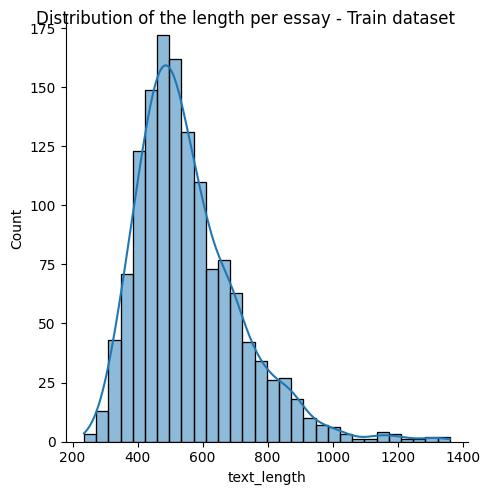

In [23]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=df_train_essays,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

In [24]:
df_train_essays["text_length"].mean() + df_train_essays["text_length"].std()

716.0440978092684

In [30]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

In [25]:
from keras_core.optimizers import Adam

In [26]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(5e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
   ]
)


# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

100%|██████████| 580/580 [00:00<00:00, 1.56MB/s]
100%|██████████| 226k/226k [00:00<00:00, 1.03MB/s]
100%|██████████| 515/515 [00:00<00:00, 532kB/s]
100%|██████████| 253M/253M [00:08<00:00, 30.3MB/s]


Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

using only 10% of the original data so training is faster.


In [27]:
sample_size = int(0.1 * len(df_train_essays_final))
df_sampled = df_train_essays_final.sample(sample_size, random_state=42)

In [29]:
# # Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sampled["text"],
                                                 df_sampled["generated"],
                                                 test_size=0.3,  # Split the sampled data 50/50
                                                 random_state=42)


In [38]:
# # Split the dataset into train and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df_train_essays_final["text"],
#                                                     df_train_essays_final["generated"],
#                                                     test_size=0.33,
#                                                     random_state=42)

In [30]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

51/51 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - loss: 0.4583 - sparse_categorical_accuracy: 0.7124 - val_loss: 0.2654 - val_sparse_categorical_accuracy: 0.8657


In [31]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Generated","Generated"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [33]:
y_pred_test = classifier.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step


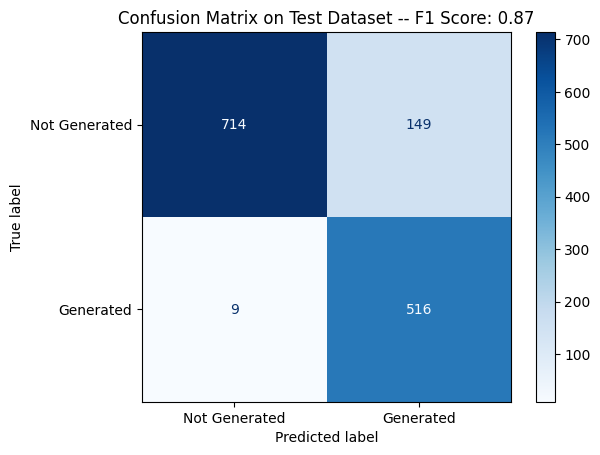

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [38]:
prediction = classifier.predict(["The old botanist clutched the wilting seed, the last of its kind.  Starship engines roared, Earth a receding blue marble.  Years later, on a barren alien world, she planted the seed, a tear tracing a path through the dust on her cheek.  A single green sprout unfurled, a fragile promise against the dying sun.  Hope, like a tiny fist, punched through the desolate landscape"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [39]:
print(prediction)

[[-0.82946336  0.76856595]]
